- t $\theta$ 平角 经度 (-180,180)
- p $\phi$   仰角 纬度 (-90,90)

## 经纬度转为二维空间坐标

In [125]:
import numpy as np

In [126]:
S=0.75

def meshgrid(xs,ys):
    xs,ys=np.meshgrid(xs,ys)
    xs=xs.flatten()
    ys=ys.flatten()
    return xs,ys

def sph_c2d(ts,ps):
    """球谐坐标转2D坐标"""
    xs=[]
    ys=[]
    for t,p in zip(ts,ps):
        x=t*np.cos(p*S)
        y=p
        xs.append(x)
        ys.append(y)
    xs=np.array(xs)
    ys=np.array(ys)
    return xs,ys

def c2d_sph(xs,ys):
    """2D坐标转球谐坐标"""
    ts=[]
    ps=[]
    for i,y in enumerate(ys):
        x=xs[i]
        # print(x,y)
        p=y
        t=x/(np.cos(S*p))
        if t> np.pi:continue
        if t<-np.pi:continue
        ts.append(t)
        ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    return ts,ps

def sph_c3d(ts,ps,r=1):
    """球谐坐标转3D坐标"""
    xs=np.cos(ps)*np.cos(ts)*r
    ys=np.cos(ps)*np.sin(ts)*r
    zs=np.sin(ps)*r
    return xs,ys,zs

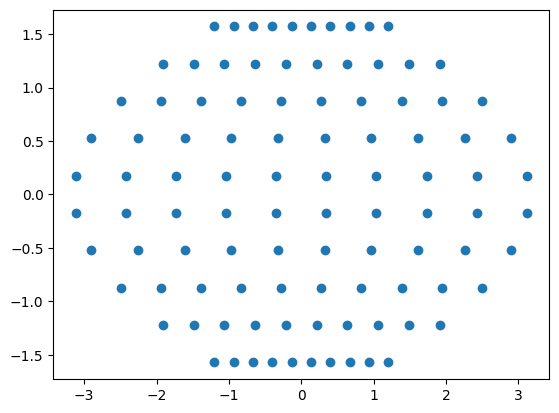

In [127]:
import numpy as np
import matplotlib.pyplot as plt


tr=np.linspace(-np.pi,np.pi,10)
pr=np.linspace(-np.pi/2,np.pi/2,10)
ts,ps=meshgrid(tr,pr)
xs,ys=sph_c2d(ts,ps)

plt.scatter(xs,ys)
plt.show()

## 二维空间坐标转为经纬度

-3.126229638874136 3.126229638874136
-1.5707963267948966 1.5707963267948966


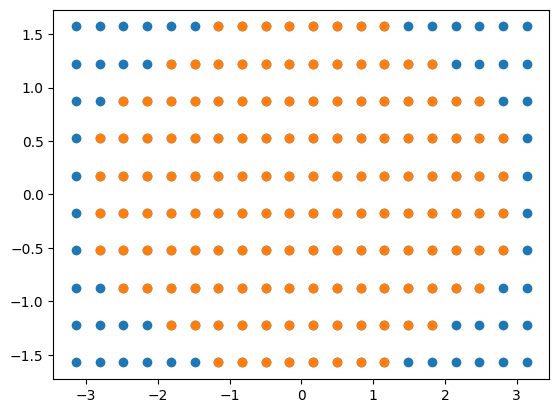

In [128]:
xr=np.linspace(-np.pi,np.pi,20)
yr=np.linspace(-np.pi/2,np.pi/2,10)
xs,ys=meshgrid(xr,yr)
plt.scatter(xs,ys)
ts,ps=c2d_sph(xs,ys)
xs,ys=sph_c2d(ts,ps)
plt.scatter(xs,ys)
print(min(ts),max(ts))
print(min(ps),max(ps))

## 经纬度转为三维空间坐标

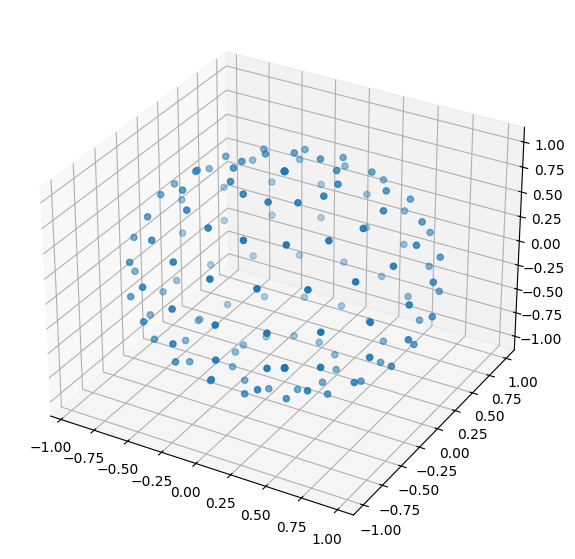

In [129]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
xs,ys,zs=sph_c3d(ts,ps)
ax.scatter(xs,ys,zs)

In [130]:
import sys
sys.path.append('d:/code/pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.spaceProp import wfnfunc
import numpy as np

In [131]:
path="D:\gfile\pywfn\C20_t.log"
mol=Mol(LogReader(path))
ts=np.linspace(0,2*np.pi,100)
ps=np.linspace(-np.pi/2,np.pi/2,100)
ts,ps=meshgrid(ts,ps)
xs,ys,zs=sph_c3d(ts,ps)
wfnCaler=wfnfunc.Calculator(mol)
grids=np.array([xs,ys,zs]).T
print(grids.shape)
wfnCaler.set_grid(grids)
wfnCaler.obtWfn(0)

(10000, 3)


array([-0.    , -0.    , -0.    , ..., -0.0001, -0.0001, -0.0001])

59


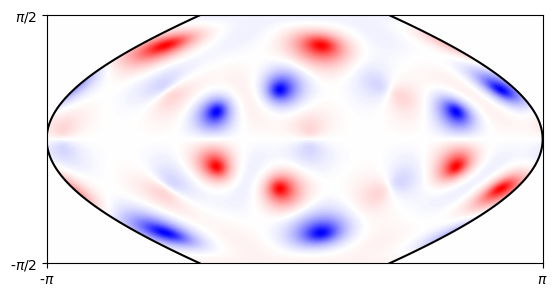

In [132]:
import matplotlib.pyplot as plt

# plt.contourf(matrix,cmap='bwr',levels=100)
S=0.75
nx,ny=1000,500
xs=np.concatenate([np.ones(100)*-np.pi,np.ones(100)*np.pi])
ys=np.concatenate([np.linspace(-np.pi/2,np.pi/2,100),np.linspace(-np.pi/2,np.pi/2,100)])
xs*=np.cos(S*ys)
xs/=np.pi*2
ys/=np.pi
xs+=0.5
ys+=0.5

for i in range(59,60):
    matrix=wfnCaler.sph_2DWfn(2.14/0.529177,i)
    vm=np.max(np.abs(matrix))
    plt.imshow(matrix,cmap='bwr',vmin=-vm,vmax=vm)
    plt.xticks([0,nx],['-$\pi$','$\pi$'])
    plt.yticks([0,ny],['-$\pi$/2','$\pi$/2'])
    plt.plot(xs[:100]*nx,ys[:100]*ny,color='black')
    plt.plot(xs[100:]*nx,ys[100:]*ny,color='black')
    plt.xlim(0,nx)
    plt.ylim(0,ny)
    plt.savefig(f'fig{i:0>2}.png',dpi=300,bbox_inches='tight')
    print(i)

## 地图投影公式
![](./imgs/地图投影公式.png)

In [1]:
import numpy as np
R=2.14/0.529177
R=2.29/0.529177
nx=1000
ny=500
# 地图坐标
xr=np.linspace(-2*R*2**0.5,2*R*2**0.5,nx)
yr=np.linspace(-R*2**0.5,R*2**0.5,ny)
xs,ys=np.meshgrid(xr,yr)
xs=xs.flatten()
ys=ys.flatten()
# 经纬度
theta=np.arcsin(ys/(R*2**0.5))
lons=np.pi*xs/(2*R*2**0.5*np.cos(theta)) # 经度
lots=np.arcsin((2*theta+np.sin(2*theta))/np.pi) # 纬度
bxs=R*2*2**0.5/np.pi*np.cos(theta)

# 三维空间坐标
grids=np.zeros(shape=(nx*ny,3))
grids[:,1]=R*np.sin(lots) # y轴作为南北极

grids[:,0]=R*np.cos(lots)*np.cos(lons) # x轴
grids[:,2]=R*np.cos(lots)*np.sin(lons) # z轴
idx=np.argwhere(np.logical_or(lons>np.pi,lons<-np.pi)) # 不符合条件的角度找出来
grids.shape

(500000, 3)

In [2]:
import sys
sys.path.append('d:/code/pywfn')
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.spaceProp import wfnfunc
path="D:\gfile\pywfn\C20.log"

mol=Mol(LogReader(path))

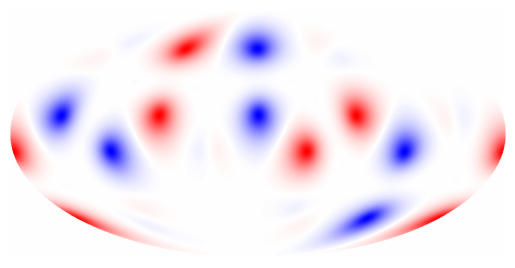

In [5]:
import matplotlib.pyplot as plt
wfnCaler=wfnfunc.Calculator(mol)
wfnCaler.set_grid(grids)

obts=[37,47,48,49,55,56,57,58,59,60]
for i in obts:
    
    wfnvals=wfnCaler.obtWfn(i-1)
    wfnvals[idx]=0
    if i in [47,55,59,60]:
        wfnvals*=-1
    
    img=wfnvals.reshape(ny,nx)
    mv=np.max(np.abs(img))
    plt.axis('off')
    plt.imshow(img,vmin=-mv,vmax=mv,cmap='bwr',origin='lower')
    plt.savefig(f'地图映射图像/{i:0>2}.png',dpi=300,bbox_inches='tight')

In [6]:
np.linalg.norm(mol.coords,axis=1)

array([3.722 , 3.6491, 3.7212, 3.9141, 3.914 , 3.9138, 3.7208, 3.9137,
       3.9137, 3.9137, 3.9137, 3.9137, 3.9138, 3.7208, 3.9137, 3.9141,
       3.914 , 3.722 , 3.6491, 3.7212])

In [9]:
from pywfn.molprop import matrix
mat=matrix.Calculator(mol).piEleMat()
neles=mat.sum(axis=0)
total=0
for o,ele in enumerate(neles):
    if ele<.5:continue
    print(o+1,ele)
    total+=ele

37 2.202090417161986
47 1.949193622521276
48 1.9478625425778318
49 1.9478449439908236
55 1.844018068417107
56 1.845296210943874
57 1.845276535987903
58 1.854416753471726
59 1.854397643189732
60 1.9995738244956769


In [10]:
mat.sum(),total

(np.float64(20.051762599028528), np.float64(19.289970562757937))